### 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Lenght
- 타겟/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습알고리즘: 최근접이웃알고리즘

[1] 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FILE = '../data/fish.csv'

In [3]:
# 행 : Bream, Smelt, 컬럼: Species, Weight, Height => 0, 1, ,2
fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [4]:
mask = (fishDF['Species'] == 'Bream') | (fishDF['Species'] == 'Smelt')
twoDF = fishDF[mask]
twoDF.reset_index(drop=True, inplace=True)

In [5]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
twoDF.loc[:,'Code']=twoDF['Species'].replace({'Bream':0, 'Smelt':1})

C:\Users\KDP15\AppData\Local\Temp\ipykernel_14920\3376092970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF.loc[:,'Code']=twoDF['Species'].replace({'Bream':0, 'Smelt':1})


[2] 피쳐와 타겟 분리

In [6]:
features=twoDF[['Weight', 'Length']]
target=twoDF['Code']

print(f'features => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (49, 2), 2D
target => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# train:test = 80:20 ==> test_size = 0.2 또는 train_size = 0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율 고려
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=10)
# stratify는 target이 두개의 클래스로 구성된 데이터를가지고있을때 동일한 비율을 유지하게 한다.

In [9]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (39, 2), 2D
y_train : (39,), 1D
X_test : (10, 2), 2D
y_test : (10,), 1D


In [10]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()[0]/y_train.shape[0],  y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [11]:
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

[3-2] 피쳐 스케일링

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [26]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(X_train)

MinMaxScaler()

In [28]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [34]:
# 학습용 데이터 ==> 스케일링 ==> ndarray 타입 반환
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()

((39, 2), 0.0, 1.0000000000000002)

In [33]:
# 테스트용 데이터 ==> 스케일링  ==> ndarray 타입 반환
X_test_scaled=mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습 진행 => fit()

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [37]:
# 학습 진행 ===> 학습용 데이터셋
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [38]:
# 학습 후 모델 파라미터
model.classes_ ,  model.n_samples_fit_

(array([0, 1], dtype=int64), 39)

[5] 모델 성능평가 ==> score() 메서드   + 테스트 데이터셋

In [40]:
model.score(X_test_scaled, y_test)

1.0

[6] 예측 하기 ==> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터 ==> 2D

In [41]:
new_data = pd.DataFrame([[413, 27.8]], columns=['Weight', 'Length'])
new_data

,Weight,Length
0,413,27.8


In [44]:
new_data_scaled = mmScaler.transform(new_data)
new_data_scaled 

array([[0.40904057, 0.57692308]])

In [45]:
# 임의의 새로운 데이터의 예측
model.predict(new_data_scaled)

array([0], dtype=int64)

In [46]:
#### 최근접한 k개 데이터 찾기
distance, index = model.kneighbors(new_data_scaled)

In [47]:
neighbors = index.reshape(-1).tolist()
neighbors

[25, 22, 21, 0, 6]

In [55]:
k_weight = X_train_scaled[neighbors][:,0]
k_length = X_train_scaled[neighbors][:,1]

print(k_weight, k_length, sep='\n')

[0.42615524 0.35870331 0.44629014 0.38588543 0.44629014]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359 ]


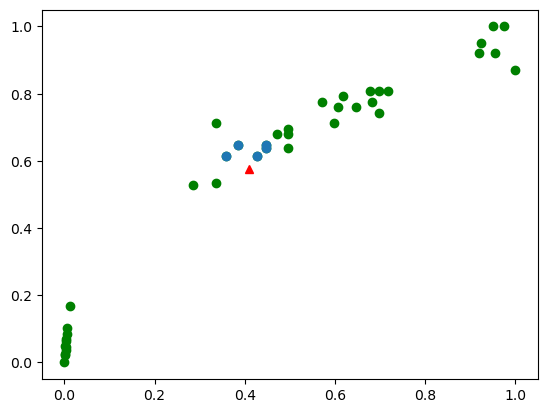

In [70]:
### 시각화로 확인
# 도미(bream), 빙어(smelt)에 대한 상관계수 ==> 2개 피쳐 Weight, Length로 Bream, Smelt 분류 가능함
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], color = 'green') # bream
#plt.scatter(twoDF.loc[35:, 'Weight'], twoDF.loc[35:,'Length']) # smelt
plt.plot(new_data_scaled[0][0],new_data_scaled[0,1], 'r^')
plt.scatter(k_weight, k_length)
plt.show()

In [59]:
new_data_scaled[0]

array([0.40904057, 0.57692308])